<a href="https://colab.research.google.com/github/Anggara13/Python-programming/blob/main/01_Intro_to_Algorithm_(Maze_%26_Gen_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🌀 **Introduction to AI** (Labyrinth Problem)

# 📑 **Main Problem**

Misalkan labirin digambarkan sebagai citra 2 dimensi dimana :   

1.   Simbol # sebagai pembatas (tidak bisa dilewati)
2.   Simbol **S** untuk *Start* (titik posisi dimulai) dan **F** untuk *Finish* (titik posisi akhir)
3.   Simbol spasi (tampilan kosong) adalah jalan yang bisa dilalui / dipilih

Maka tujuan permainan ini adalah untuk mencari jalan dari titik S (*Start*) menuju titik F (*Finish*), alih - alih mencari jalan secara manual lebih baik menggunakan tahapan tertentu untuk menyelesaikan masalah ini. Agar lebih mudah dipahami perhatikan contoh labirin berikut!




In [1]:
# Proses membaca data labirin
def ekstrak_data_maze(file_path):
    maze = []
    with open(file_path, 'r') as file:
        for line in file:
            row = list(line.strip())
            maze.append(row)
    return maze

# Menampilkan hasil labirin
def tampilkan_maze(maze):
    for i in maze:
      for j in i:
        print(j, " ", sep = "", end = "")
      print('')

In [ ]:
# Panggil fungsi untuk mengekstrak data labirin
maze1 = ekstrak_data_maze('Maze1.txt')

# Panggil fungsi untuk menampilkan labirin
tampilkan_maze(maze1)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
S                               #                   #   #   # 
#   #   # # #   # # # # # # #   # # #   # # # # # # #   #   # 
#   #       #               #       #               #   #   # 
#   # # #   #   # # #   #   #   #   #   # # # # #   #   #   # 
#       #   #       #   #   #   #   #   #       #   #   #   # 
# # #   #   # # # # #   #   #   #   #   # # #   #   #   #   # 
#       #               #   #       #           #   #       # 
#   # # #   # # # # # # #   #   # # #   # # # # # # # # # # # 
#       #                   #       #           #           # 
# # #   #   # # # # # # # # # # #   #   # # #   #   # # #   # 
#   #       #       #   #       #   #   #       #   #       # 
#   #   # # #   #   #   # # #   #   #   #   # # #   #   #   # 
#   #       #   #   #       #   #   #   #           #   #   # 
#   # # #   #   #   # # #   #   #   #   # # # # # # #   #   # 
#           #   #           #       #   #              

Permasalahan labirin dapat diselesaikan dengan menggunakan tahapan atau algoritma yang tepat. Algoritma yang dibuat perlu didesign sedinamis mungkin agar permasalahan yang sama dengan contoh data yang berbeda juga dapat diselesaikan. <br><br>

Begitu juga saat anda bekerja sebagai praktisi data maka prosedur pengolahan data hingga mendapatkan insight dari hasil pengolahan (misal pada suatu project tertentu yang bersifat periodik (daily / weekly project) tentu prosesnya harus bisa dijalankan otomatis (*schedulling*), minim *margin error* dan dinamis.

## 🏃‍♂️**Solusi**

Untuk mengasah kemampuan pembuatan algoritma dalam menyelesaikan masalah labirin, perhatikan sintaks contoh penyelesaian berikut yang dibangun menggunakan bahasa python native (tanpa bantuan *library* atau *tools* pendukung)

In [ ]:
# Proses penyelesaian masalah
def solusi(maze):
    baris = len(maze)
    kolom = len(maze[0])

    start_row = start_col = finish_row = finish_col = 0
    matriks_maze = maze

    for i in range(baris):
        for j in range(kolom):
            if (maze[i][j] == 'S'):
                start_row, start_col = i, j
            elif (maze[i][j] == 'F'):
                finish_row, finish_col = i, j

    for i in range(baris):
        for j in range(kolom):
            if (maze[i][j] != '#'):
                matriks_maze[i][j] = 1
            else:
                matriks_maze[i][j] = 0

    i, j = start_row, start_col
    matriks_maze[i][j] = 2
    run = True

    while (run):
        if((i == finish_row) & (j == finish_col)):
            run = False
        else:
            if (matriks_maze[i][j + 1] == 1):
                matriks_maze[i][j+1] = 2
                i, j = i, j + 1
            elif (matriks_maze[i+1][j] == 1):
                matriks_maze[i + 1][j] = 2
                i, j = i + 1, j
            elif (matriks_maze[i - 1][j] == 1):
                matriks_maze[i - 1][j] = 2
                i, j = i - 1, j
            elif (matriks_maze[i][j - 1] == 1):
                matriks_maze[i][j - 1] = 2
                i, j = i, j - 1
            else:
                matriks_maze[i][j] = 3
                if (matriks_maze[i][j + 1] == 2):
                    i, j = i, j + 1
                elif (matriks_maze[i + 1][j] == 2):
                    i, j = i + 1, j
                elif (matriks_maze[i - 1][j] == 2):
                    i, j = i - 1, j
                elif (matriks_maze[i][j - 1] == 2):
                    i, j = i, j - 1
                else:
                    if (i == start_row) & (j == start_col):
                      print('Jalan Buntu!')
                      break

    matriks_maze[finish_row][finish_col] = 2

    for i in range(baris):
        for j in range(kolom):
            if (matriks_maze[i][j] == 3):
                matriks_maze[i][j] = 1

    for i in range(baris):
        for j in range(kolom):
            if((i == start_row) & (j == start_col)):
                print('S ', end = '')
            elif((i == finish_row) & (j == finish_col)):
                print('F ', end = '')
            elif(matriks_maze[i][j] == 2):
                print('. ', end = '')
            elif(matriks_maze[i][j] == 1):
              print('  ', end = '')
            else:
              print('# ', end = '')
        print('')

In [ ]:
# Panggil fungsi solusi dan masukan maze1 sebagai parameter data
print('Solusi\n')
solusi(maze1)

Solusi

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
S . . . . . . .                 #                   #   #   # 
#   #   # # # . # # # # # # #   # # #   # # # # # # #   #   # 
#   #       # . . . . . . . #       #               #   #   # 
#   # # #   #   # # #   # . #   #   #   # # # # #   #   #   # 
#       #   #       #   # . #   #   #   #       #   #   #   # 
# # #   #   # # # # #   # . #   #   #   # # #   #   #   #   # 
#       #               # . #       #           #   #       # 
#   # # #   # # # # # # # . #   # # #   # # # # # # # # # # # 
#       # . . . . . . . . . #       # . . . . . # . . . . . # 
# # #   # . # # # # # # # # # # #   # . # # # . # . # # # . # 
#   # . . . # . . . #   #       #   # . # . . . # . # . . . # 
#   # . # # # . # . #   # # #   #   # . # . # # # . # . #   # 
#   # . . . # . # . #       #   #   # . # . . . . . # . #   # 
#   # # # . # . # . # # #   #   #   # . # # # # # # # . #   # 
# . . . . . # . # .         #       # . # . . .

*Eureka!* Tanda titik ( . ) pada hasil eksekusi kode merupakan jalur penyelesaiannya yang menghubungkan titik S (*start*) menuju titik F (*finish*) sehingga dapat dikatakan bahwa algoritma yang dikembangkan berhasil!

Namun untuk memastikannya, akan dicoba lagi dengan data labirin yang berbeda (kali ini labirin sedikit lebih rumit :P)

In [ ]:
# Panggil fungsi untuk mengekstrak data labirin
maze2 = ekstrak_data_maze('Maze2.txt')

# Panggil fungsi untuk menampilkan labirin
tampilkan_maze(maze2)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
S     # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# #   #                       #                   #                                               #       # # 
# #   #   # # # # # # # # #   #   # # # # #   #   # # # # #   # # # # # # # # # # # # # # # # #   #   #   # # 
# #   #       #   #           #   #           #               #       #                   #   #   #   #   # # 
# #   # # #   #   #   # # # # # # #   # # # # # # # # # # # # #   # # #   # # # # #   #   #   #   #   #   # # 
# #           #   #               #   #           #       #               #           #       #   #   #   # # 
# # # # # # # #   # # # # # # #   #   #   # # #   #   #   # # #   # # # # #   # # # # # # #   #   # # #   # # 
# #               #               #           #       #       #       #       #       #       #       #   # # 
#

In [ ]:
# Panggil fungsi solusi dan masukan maze2 sebagai parameter data
print('Solusi\n')
solusi(maze2)

Solusi

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
S . . # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # . # . . . . . . . . . . . #             . . . #         . . . . . . . . . . . . . . . . . . . #       # # 
# # . # . # # # # # # # # # . #   # # # # # . # . # # # # # . # # # # # # # # # # # # # # # # # . #   #   # # 
# # . # . . . #   # . . . . . #   # . . . . . # . . . . . . . #       #                   #   # . #   #   # # 
# # . # # # . #   # . # # # # # # # . # # # # # # # # # # # # #   # # #   # # # # #   #   #   # . #   #   # # 
# # . . . . . #   # . . . . . . . # . # . . . . . # . . . #               #           #       # . #   #   # # 
# # # # # # # #   # # # # # # # . # . # . # # # . # . # . # # #   # # # # #   # # # # # # #   # . # # #   # # 
# #               # . . . . . . . # . . .     # . . . # . . . #       #       #       #       # . . . # 

*anddd yeah, we did it!*

Algoritma yang dibuat masih bekerja dengan baik pada data yang berbeda. Ini mengindikasikan bahwa algoritma yang dibuat <u>mungkin</u> sudah tepat atau tentu anda dapat mengoptimalkan berdasarkan kreatifitas anda sendiri.

Dapatkah anda menceritakan atau menjelaskan kepada Sendja bagaimana sebenarnya algoritma diatas bekerja? Share your wonderful answer in social media platform and tag us (DQLab) dan tentu kami akan sangat senang mendengar penjelasan anda!

-----

# Generative AI

**Generative AI** atau kecerdasan buatan generatif mengacu pada penggunaan AI untuk membuat konten baru, seperti teks, gambar, musik, audio, dan video. Berbeda dengan AI tradisional yang lebih fokus pada analisis dan pengambilan keputusan, generative AI berperan aktif dalam menciptakan sesuatu yang baru. Teknologi ini bekerja dengan memanfaatkan data dalam jumlah besar sebagai bahan latihannya, lalu memprediksi elemen selanjutnya (seperti kata atau piksel) untuk menghasilkan karya.

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:670/1*3fvPnM1dCP93wxXETMLP8w.png" width="550" height="345">
<p align="center"><b>Gambar 1. Flow Generative AI</b></p>
</p>
<br>

docs : *https://cloud.google.com/use-cases/generative-ai*

## Getting Started

Untuk dapat menggunakan Generative AI di Google Colab, buat kunci API terlebih dahulu dengan mengklik tautan berikut <a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

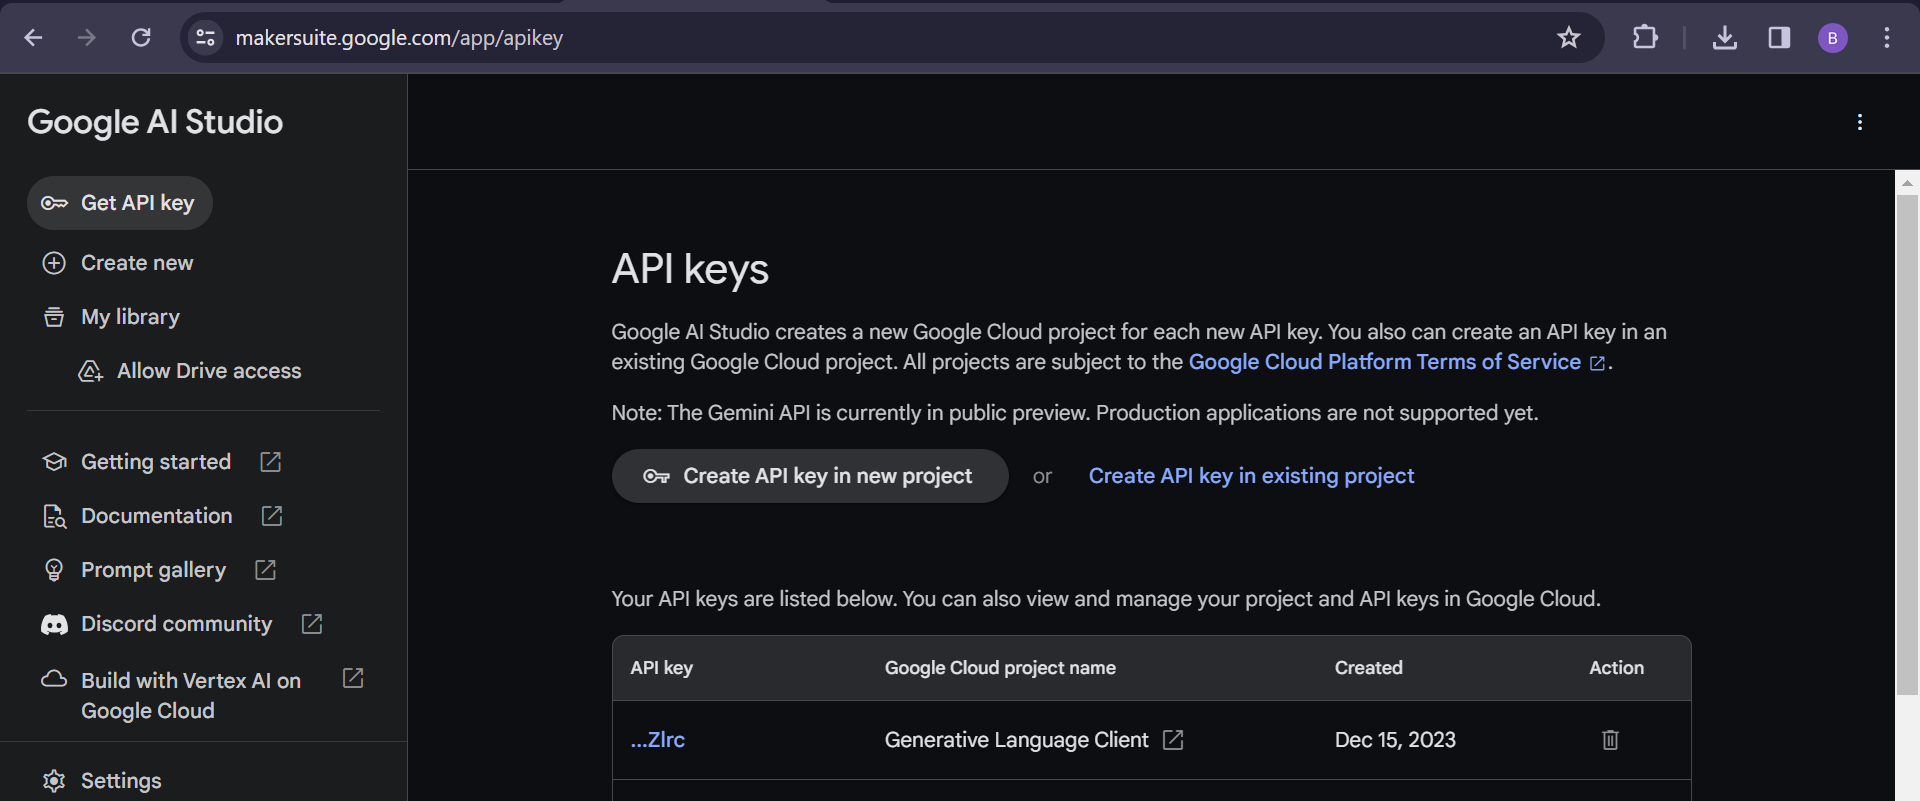


Lalu copy kode yang telah di generate ke simbol kunci bagian kiri google colab

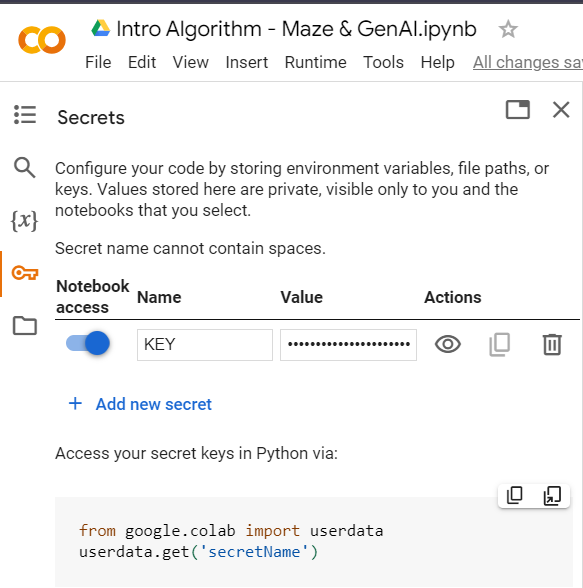
<br>

docs : <i>https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb#scrollTo=CjnS0vNTsVis</i>

In [ ]:
# Lakukan instalasi library
!pip install google-generativeai

In [ ]:
import google.generativeai as genai

# Set API Key
genai.configure(api_key = GOOGLE_API_KEY)

In [ ]:
prompt = """
  Generate data analysis roadmap
"""

model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(prompt)
print(response.text)

## Data Analysis Roadmap

This roadmap outlines the key steps involved in a typical data analysis project.  The specifics will vary depending on the project's goals, data sources, and available resources.

**Phase 1: Planning & Understanding**

* **1.1 Define the Problem/Objective:**
    * Clearly articulate the business problem or research question you are trying to address.
    * Identify key stakeholders and their needs.
    * Specify the desired outcomes and metrics for success.
* **1.2 Data Understanding:**
    * Identify relevant data sources (internal databases, external APIs, surveys, etc.).
    * Assess data availability, quality, and accessibility.
    * Understand the data structure, schema, and variables.
    * Document data limitations and potential biases.
* **1.3 Develop an Analysis Plan:**
    * Define the analysis techniques to be used (descriptive statistics, regression, clustering, etc.).
    * Outline the steps involved in data cleaning, transformation, and analysis